# Mathematical Model of COVID19 using Standard Model of Disease Spread
## The SIR (Susceptible Infected Recover) Model
Author: Faisal Rehman [FR ابوھاد]

email: fslurrehman@hotmail.com

Date: 27-03-20

Note: Recovered means those who cannot be infected anymore. They can be dead.

It is based on SIR model presented at below video from numberphile youtube channel which is shared at the end of this notebook.

In order to run this simulation, select the second cell below and press run button to generate graph. You can then use sliders to adjust the output. 

In [155]:
%matplotlib inline
from ipywidgets import interactive
from IPython.display import display
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

maxT,max_tr,max_rr = 20,10,1
N = 1
Istart = 0.01
Sstart = N - Istart
Rstart= 0


def solve_model(time = maxT, transm_rate = max_tr, recov_rate = max_rr):
    
    mT, tr, rr = time, transm_rate, recov_rate
    Ss, Is, Rs = Sstart, Istart, Rstart
 
    
    def model(Y, t, tr,rr):
        s, i, r = Y
        ds = -tr*s*i
        di = tr*s*i - rr*i 
        dr = rr*i
        return ds, di, dr

    t = np.linspace(0, mT, 200)
    f = odeint(model, (Ss, Is, Rs), t, args=(tr, rr))
    S, I, R = f.T

    plt.plot(t,S,label = 'Susceptible')
    plt.plot(t,I,label = 'Infected')
    plt.plot(t,R,label = 'Recovered/Dead')
    plt.xlabel('time')
    plt.ylabel('Population')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

    

w = interactive(solve_model, mT = (0,maxT,0.01), tr = (0,max_tr,0.1), rr = (0,max_rr,0.01))
display(w)

interactive(children=(IntSlider(value=20, description='time', max=60, min=-20), IntSlider(value=10, descriptio…

# How it Works:

Step#1: Declaration of some constants

1. N = Population of Size 1.

 Below are some initial conditions:
2. Istart = no. of infected at start
3. Sstart = Susceptible People at start 
4. Rstart = Recovered People at starat 

Now I need to create slider. SoI will first import required libraries

Step#2: Define functions for sliders i.e.,
1. transmission rate (transm_r)
2. recovery rate (recov_r)
3. max time (maxT)

Now embed the sliders by running the below code:

Step#3: Define 03 Differential Equations

\begin{align}
\frac{d}{dt}S(t,S,I,R) = -transm_r*S*I \\
\frac{d}{dt}I(t,S,I,R) = transm_r*S*I - recov_r*I \\
\frac{d}{dt}R(t,S,I,R) = recov_r*I 
\end{align}
 

Step#4: Solve these equations by numerical integration and plot. 

You can watch its Numberphile youtube video by runnning below cell to know about mathematics behind these models.

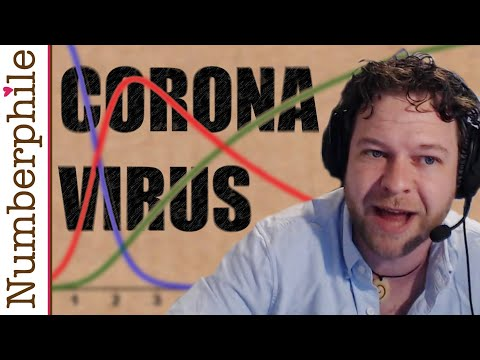

In [153]:
from IPython.display import YouTubeVideo
YouTubeVideo('k6nLfCbAzgo', width=850, height=450)